#**(4)Decision Tree(Supervised learning, Mainly Classification Based)**
- Decision tree is supervised Machine Learning Algorithms and we can use it for **both classification and regression but mostly use in Classification Problem.**
- It can work on both **categorical and continuous dependent variables.**

-  It is a tree-structured classifier, where **internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.**

- In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. **Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.**

- Decision Trees usually mimic human thinking ability while making a decision, so it is easy to understand.

<figure align="left">
<img src="https://drive.google.com/uc?id=1YBa3_GshnJlTsEz2KlzcmwOM5IIxntV0" height="250px", width="350px"> 
</figure>
<figure align="center">
<img src="https://drive.google.com/uc?id=15J-mMjnSAAPw1RmTwv3cb16Me669-_KX" height="250px", width="350px"> 
</figure>

#**Attribute Selection Measure for Splitting Tree**
- In Decision tree we need to select the best attributes for the root node and for sub-nodes.**There is a technique which is called as Attribute selection measure(ASM).**
- In above figure **"Salary is between","Office near to home","Provide cab facility" are attributes.**

- There are two popular techniques for ASM, which are **Information Gain and Gini Index.**

##**(a)Information Gain**

- Information gain is the measurement of changes in entropy after the segmentation of a dataset based on an attribute.

- A decision tree algorithm always tries to maximize the value of information gain, and  **Independent variable(feature) or node or attribute or having the highest information gain is split first.**

- The **Independent variable(feature) having  higher  value of information gain work as a root node and so on.**
- It can be calculated using the below formula:

 $$Information Gain= Entropy(TargetFeature)- [(Weighted Avg) *Entropy(IndependentFeature)]$$


- Entropy specifies randomness in data. Entropy can be calculated as:

$$Entropy(TargetFeature)= -P(yes)log_2 P(yes)- P(no) log_2 P(no)$$
$$Entropy(IndependentFeature)= -P(yes)log_2 P(yes)- P(no) log_2 P(no)$$

- Where,
 P(yes or 1)= probability of yes, P(no or 0)= probability of no.
- Entropy give more balanced tree so we used Entropy.



##**(b)Gini index**
- Gini index is a measure of impurity or purity used while creating a decision tree in the CART(Classification and Regression Tree) algorithm.
- An attribute(feature) with the low Gini index should be preferred as compared to the high Gini index **i.e smaller gini index chosen as the splitting point.**

- Mathmatically Gini index can be calculated as follows:
\begin{equation}
    \text{Gini} = 1 - \sum_{i=1}^{n} (P_{yes}^2+P_{No}^2)
\end{equation}
\begin{equation}
    \text{Gini} = 1 - \sum_{i=1}^{n} P_{i}^2
\end{equation}
- Where,P(yes or 1)= probability of yes in Independent variable(feature), P(no or 0)= probability of no Independent variable(feature) and so on.
- Gini  is computationally fast  so we  used Gini Index.

##**In Decision Tree, Overfitting is a Serious Problem**
To avoid overfitting in the decision tree  we have to do following works:

**(a)Early stopping:**By imposing certain stopping criteria on some node and try to stop the tree-building process early.




**(b)Pruning:**
Pruning reduces the size of decision trees by removing some node  of the tree that do not provide power to classify instances.



##**Model building in Scikit-learn:**
- Let's build the diabetes prediction model.
- Here, we are going to predict diabetes using Decision Tree Classifier.
- Let's first load the required Pima Indian Diabetes dataset using the pandas' read CSV function.

In [ ]:
from google.colab import drive     #mount your Google Drive in your virtual machine(VM).
drive.mount('/gdrive')              #Access  the data  drive because of different server of colab and drive.

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
pima=pd.read_csv('/gdrive/My Drive/ML Project /Feature Engineering /4.ML Algorithms/diabetes.csv',quoting=3)
                                 #Read data file with path location step by step path location from My Drive.

In [ ]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Now,we need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [ ]:
#split dataset in features and target variable
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin', 'BMI','DiabetesPedigreeFunction','Age']
X = pima[feature_cols] # Features/independent variables
y = pima.Outcome # Target variable/dependent variables


# or Also we can write above code as this also. 
X = pima.drop('Outcome', axis=1)   #Features/independent variables
y = pima['Outcome']               # Target variable/dependent variables

Let's split dataset by using function train_test_split().

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Since, we have different range of features so we need to apply Feature Scaling techniques to bring features in same scale.

In [ ]:
#Feature Scaling techniques to bring features in same scale.
from sklearn.preprocessing import RobustScaler # Or we can also use StandardScaler,MinMaxScaler depending on the dataset.
rb = RobustScaler()  
X_train = rb.fit_transform(X_train)
X_test = rb.transform(X_test)

pd.DataFrame(X_train )   ##Convert numpy array generated by sklearn libraries to orginal dataframe.
pd.DataFrame(X_test )    ##Convert numpy array generated by sklearn libraries to orginal dataframe.

,0,1,2,3,4,5,6,7
0,0.6,-0.487179,-0.8750,0.31250,1.136802,0.215633,0.154466,0.8750
1,-0.2,-0.128205,0.1875,0.28125,-0.327553,0.398922,-0.603089,-0.5000
2,-0.2,-0.230769,-0.5000,-0.71875,-0.327553,-0.129380,-0.576226,-0.5000
3,1.0,-0.256410,0.5000,-0.71875,-0.327553,-0.797844,1.298858,0.3125
4,0.8,0.487179,1.1250,-0.71875,-0.327553,-0.226415,-0.436535,1.3125
...,...,...,...,...,...,...,...,...
149,1.2,1.230769,1.0000,-0.71875,-0.327553,-0.172507,-0.189389,1.2500
150,-0.4,-1.025641,-1.0000,0.21875,0.104046,0.140162,2.359973,-0.3125
151,1.0,-0.564103,0.0000,-0.71875,-0.327553,0.517520,0.302216,1.7500
152,-0.2,0.743590,-0.1250,0.46875,2.447013,-0.431267,-0.095366,0.0000


Lets ,import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.

Then, fit our model on the train set using fit() and perform prediction on the test set using predict().

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
pd.DataFrame(y_pred)   ###Convert numpy array generated by sklearn libraries to orginal dataframe.

,0
0,0
1,0
2,0
3,0
4,0
...,...
149,1
150,0
151,1
152,0


Model Evaluation using Confusion Matrix

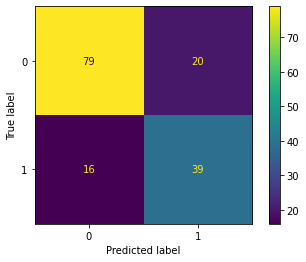

In [ ]:
from sklearn.metrics import plot_confusion_matrix
display = plot_confusion_matrix(clf,X_test,y_test)
plt.show()

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[79, 20],
       [16, 39]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7662337662337663


In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(precision)

0.6610169491525424


In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(recall)

0.7090909090909091


In [ ]:
from sklearn.metrics import f1_score 
f1_score = f1_score(y_test, y_pred)
print(f1_score)

0.6842105263157895


#**Optimizing Decision Tree Performance**
- Lets use  parameter  **“gini” for the Gini index and “entropy” for the information gain.**

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3) #The maximum depth of the tree is 3.
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7662337662337663


#**Visualizing Decision Trees**

- We can use Scikit-learn's **export_graphviz** function for display the tree within a Colab notebook. For plotting tree, we also need to install **graphviz and pydotplus.**

- **export_graphviz** function converts decision tree classifier into dot file and pydotplus convert this dot file to png.

- The **StringIO module** is an in-memory file-like object. This object can be used as input or output to the most function that would expect a standard file object. When the StringIO object is created it is initialized by passing a string to the constructor. If no string is passed the StringIO will start empty.



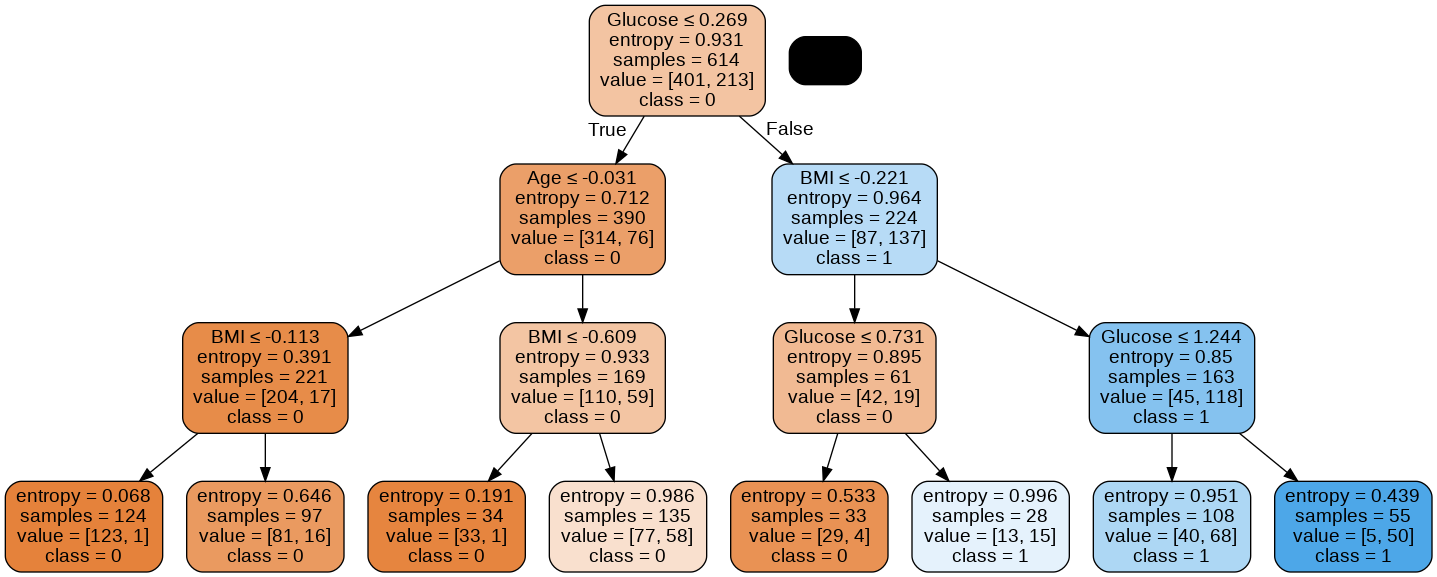

In [ ]:
from six import StringIO                        #StringIO module is an in-memory file-like object.
from IPython.display import Image               #For display images
from sklearn.tree import export_graphviz        #For plotting tree, we also need to install graphviz and pydotplus.
import pydotplus                                #For plotting tree, we also need to install graphviz and pydotplus.
dot_data = StringIO()                           #When the StringIO object is created it is initialized by passing a string to the constructor
export_graphviz(clf, out_file=dot_data,         #export_graphviz function converts decision tree classifier into dot file 
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())